---
title: "Tidydata 만들기"
author: "강신성"
date: "2023-10-23"
date-format: iso
categories: [python, pandas]
---




> 여러가지 방법들을 사용해서 tidydata를 만들어보자!

## 1. 라이브러리 imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
from plotnine import *

## 2. Pandas - `lambda _df :`의 활용

### **A. `lambda _df :` with indexer**
---




\- `예시 1` : 아래와 같은 데이터프레임이 있다고 할 때, 표현 1, 2, 3은 모두 같은 문법이다.

In [2]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

,A,B,C
0,-1.0,2.0,NaN
1,NaN,3.0,4.0
2,1.0,NaN,5.0
3,1.0,4.0,6.0


표현 1

In [3]:
df[df.A.isna()]  ## 행 슬라이싱, [False, True, False, False]

,A,B,C
1,NaN,3.0,4.0


표현 2

In [4]:
df[(lambda _df : _df.A.isna())(df)]

,A,B,C
1,NaN,3.0,4.0


표현 3

In [5]:
df[lambda _df : _df.A.isna()]  ## 괄호로 함수를 묶어줘도 되고(그럼 구분이 쉬워진다), 안해도 됨

,A,B,C
1,NaN,3.0,4.0


\- `예시 2` : `.loc`, `.iloc`

In [6]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

,A,B,C
0,-1.0,2.0,NaN
1,NaN,3.0,4.0
2,1.0,NaN,5.0
3,1.0,4.0,6.0


In [7]:
df.loc[lambda _df : _df.A.isna()]

,A,B,C
1,NaN,3.0,4.0


In [8]:
df.iloc[lambda _df : list(_df.A.isna())]  ## iloc은 튜플로 입력이 안된다.

,A,B,C
1,NaN,3.0,4.0


> iloc의 경우 범용성이 떨어지긴 한다... 그러니까 왠만해선 .loc을 사용하거나 시리즈를 list로 묶어주자...

근데 왜 이런 문법이 있을까? 연속적으로 DataFrame을 변화시켜야 할 경우 유용하기 때문이다.

\- `예시 3`

In [9]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

,A,B,C
0,-1.0,2.0,NaN
1,NaN,3.0,4.0
2,1.0,NaN,5.0
3,1.0,4.0,6.0


In [10]:
df.assign(D = df.A + df.B + df.C)  ## 결측치가 있을 경우 합은 NaN이 됨.

,A,B,C,D
0,-1.0,2.0,NaN,NaN
1,NaN,3.0,4.0,NaN
2,1.0,NaN,5.0,NaN
3,1.0,4.0,6.0,11.0


> 해당 데이터프레임에서 결측치의 수가 50%가 넘는 열만 고르고 싶다면?

In [11]:
df.assign(D = df.A + df.B + df.C).loc[:, lambda _df : _df.isna().mean() > 0.5]

,D
0,NaN
1,NaN
2,NaN
3,11.0


### **B. `lambda df:` with assign**
---




`예시 1`

In [12]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

,A,B,C
0,-1.0,2.0,NaN
1,NaN,3.0,4.0
2,1.0,NaN,5.0
3,1.0,4.0,6.0


In [13]:
df.assign(D = df.A + df.B + df.C)

,A,B,C,D
0,-1.0,2.0,NaN,NaN
1,NaN,3.0,4.0,NaN
2,1.0,NaN,5.0,NaN
3,1.0,4.0,6.0,11.0


> 여기에서 결측치의 값을 count하여 새로운 열 `E`에 할당하고 싶다면?

In [14]:
df.assign(D = df.A + df.B + df.C).assign(E = lambda _df : _df.isna().sum(axis = 1))

,A,B,C,D,E
0,-1.0,2.0,NaN,NaN,2
1,NaN,3.0,4.0,NaN,2
2,1.0,NaN,5.0,NaN,2
3,1.0,4.0,6.0,11.0,0


`예시 2` : 원본 데이터를 손상시키지 않으며 데이터를 변형하고 싶을 때

In [15]:
np.random.seed(43052)
df = pd.DataFrame({'A':[12,234,3456,12345,654222]})
df

,A
0,12
1,234
2,3456
3,12345
4,654222


In [16]:
df2 = df
df2['B'] = np.log(df2.A)
df2['C'] = (df2.B - df2.B.mean())/df2.B.std()

df

,A,B,C
0,12,2.484907,-1.286574
1,234,5.455321,-0.564847
2,3456,8.147867,0.089367
3,12345,9.421006,0.398704
4,654222,13.391202,1.363350


> **???**

~이성적으로 이해하기 어려운 결과~ 왜 이렇게 될까? 왜냐면 df2는 df와 같은 녀석을 의미하기 때문이다.(id가 같음)

In [17]:
df2 = df.copy()
df2['B'] = np.log(df2.A)
df2['C'] = (df2.B - df2.B.mean())/df2.B.std()

df

,A,B,C
0,12,2.484907,-1.286574
1,234,5.455321,-0.564847
2,3456,8.147867,0.089367
3,12345,9.421006,0.398704
4,654222,13.391202,1.363350


> 이러면 원본 데이터를 손상시키지 않는다. 또는...

In [18]:
df.assign(B = lambda _df : np.log(df.A)).assign(C = lambda _df : (_df.B - _df.B.mean())/_df.B.std())

,A,B,C
0,12,2.484907,-1.286574
1,234,5.455321,-0.564847
2,3456,8.147867,0.089367
3,12345,9.421006,0.398704
4,654222,13.391202,1.363350


## 3. Pandas - Multi_index의 이해

### **A. 원래 `df`, `s`는 딕셔너리 계열임**
---




\- 예시 1 : df는 dict에서 만들 수 있음

In [19]:
dct = {'A': [1,2,3],'B': [2,3,4]}  ## 애초에 데이터프레임에 입력되는 값과 동일...
df = pd.DataFrame(dct)
df

,A,B
0,1,2
1,2,3
2,3,4


\- 예시 2 : s도 dict에서 만들 수 있음.

In [20]:
dct = {'43052': 80, '43053': 90, '43054': 50}   ## key가 index가 된다.
s = pd.Series(dct)
s

43052    80
43053    90
43054    50
dtype: int64

\- 예시 3 : dict의 키로 올 수 있는 것들

* 튜플로 dict를 만든다면?

In [21]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
s

43052  4    80
43053  1    90
43054  2    50
dtype: int64

In [22]:
s.index

MultiIndex([('43052', 4),
            ('43053', 1),
            ('43054', 2)],
           )

> 멀쩡하게 잘 작동한다. 그리고 MultiIndex가 나온다.

### **B. `.index`혹은 `.columns`에 `name`이 있는 경우**
---




`예시 1` : index에 이름이 있는 경우

In [23]:
dct = {'43052': 80, '43053': 90, '43054': 50}
s = pd.Series(dct)
s.rename_axis(['id'])  ## set_axis()가 인덱스와 컬럼의 이름을 조정하는 것이라면 이건 그것의 이름을 조정한다.

id
43052    80
43053    90
43054    50
dtype: int64

In [24]:
s.index, s.rename_axis(['id']).index

(Index(['43052', '43053', '43054'], dtype='object'),
 Index(['43052', '43053', '43054'], dtype='object', name='id'))

`예시 2` : index에 이름이 있는 경우(멀티 인덱스)

In [25]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
s.rename_axis(['id','year'])

id     year
43052  4       80
43053  1       90
43054  2       50
dtype: int64

> MultiIndex에서 인덱스의 이름을 각각 지정해준 경우이다.

* 예시 2가 데이터프레임이라면 이렇게 보인다.

In [26]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
df = pd.DataFrame(s.rename_axis(['id','year']))  ## index의 이름을 지정해줌
df

,,0
id,year,
43052,4,80
43053,1,90
43054,2,50


> 만약 여기서 각 원소를 호출하고 싶다면...

In [27]:
df.loc[('43052', 4)]

0    80
Name: (43052, 4), dtype: int64

> 그냥 멀티인덱스, 튜플을 입력하여 호출하면 된다.

## 4. Tidydata

### **A. tidydata의 개념**
---




\- 아래의 자료는 불리하다.

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index=['gender','department'], columns='result',values='count',aggfunc=sum)
df

result             fail  pass
gender department            
female A             19    89
       B              7    18
       C            391   202
       D            244   131
       E            299    94
       F            103   238
male   A            314   511
       B            208   352
       C            204   121
       D            279   138
       E            137    54
       F            149   224

> 만약 A학과에 해당하는 결과만 뽑고 싶다면? -> department가 column으로 있어야 함...
>
> pass인 사람만 bar plot을 그리고 싶다면? result가 column으로 있어야 함...

원하는 정보를 쉽게 뽑아낼 수 있는 데이터를 **tidydata**라고 한다.

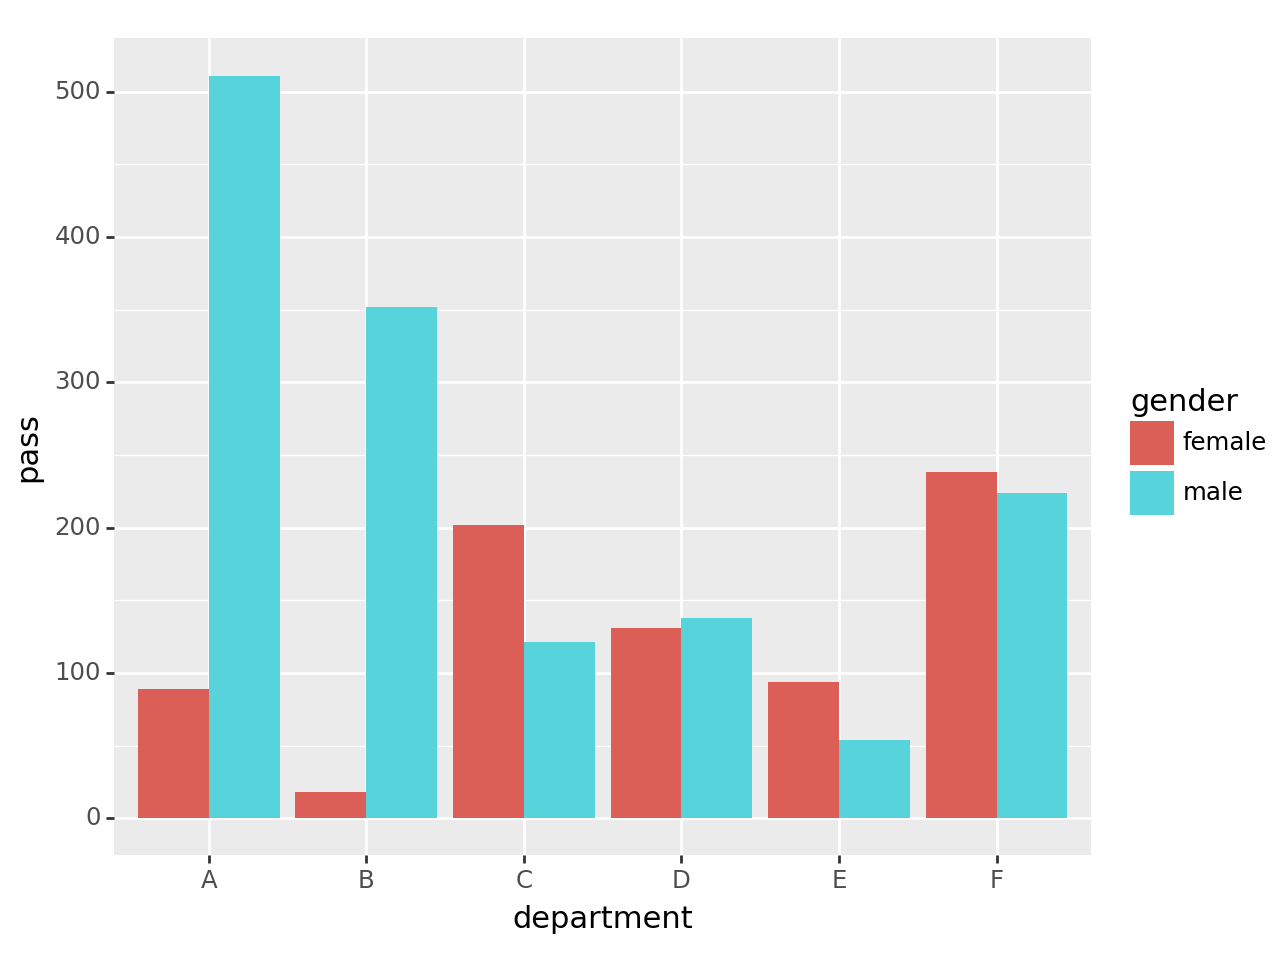

<Figure Size: (640 x 480)>

In [29]:
tidydata = df['pass'].reset_index()
#---#
fig = ggplot(tidydata)
col = geom_col(aes(x='department',y='pass',fill='gender'),position='dodge')   ## dodge 설정으로 누적으로 표기하지 않고 옆에 늘여서 표시
fig + col

### **B. tidydata가 아닌 예시**
---




1. MultiIndex 구조를 가지면 무조건 tidydata가 아님
2. 열의 값이 여러 개의 정보를 가지고 있다면 tidydata가 아님
3. wide data는 tidydata가 아님 -> melt나 pivot_table등을 활용하여 조정해줘야...

\- `wide df` 예시

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


\- 여러 방법을 통해 tidydata로 변환

In [31]:
df.set_index(['Date']).stack().reset_index().rename({'level_1' : 'Brand', 0 : 'Sales'}, axis = 1)

,Date,Brand,Sales
0,2019-10,Samsung,461
1,2019-10,Apple,324
2,2019-10,Huawei,136
3,2019-10,Xiaomi,109
4,2019-10,Oppo,76
...,...,...,...
203,2020-10,Nokia,20
204,2020-10,Lenovo,22
205,2020-10,OnePlus,9
206,2020-10,Sony,22


\- melt를 통해 변환

In [32]:
df.melt(id_vars = ['Date'])  ## 이럼 한번에 되서 편하긴 하다. wide data 한정

,Date,variable,value
0,2019-10,Samsung,461
1,2019-11,Samsung,461
2,2019-12,Samsung,426
3,2020-01,Samsung,677
4,2020-02,Samsung,593
...,...,...,...
203,2020-06,Asus,16
204,2020-07,Asus,12
205,2020-08,Asus,20
206,2020-09,Asus,15


> `df.melt(id_vars = [])`는 index로 지정한 열외의 모든 열들을 한 행에 엮어버린다.
>
> `df.stack()`의 경우 `set_index()`나 `reset_index()`등 사용해야 할 게 많을 수 있다. 하지만 직관적이고 사용에 용이하다.
>
> `df.stack()`의 반대로 `df.unstack()`을 사용하여 인덱스를 컬럼으로 올릴수도 있다.

## 5. `pivot_table`, `groupby` + `aggregate`

> 대부분은 `pivot_table`로 해결이 된다.

### **A. intro**
---




\- tidydata 만드는 개념 : 그룹화 -> 집계

`예제 1` : 아래의 데이터프레임에서 학과, 성별로 count의 합계를 구하라.

In [33]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1)
df

,department,result,gender,count
0,A,fail,female,19
1,A,fail,male,314
2,A,pass,female,89
3,A,pass,male,511
4,B,fail,female,7
5,B,fail,male,208
6,B,pass,female,18
7,B,pass,male,352
8,C,fail,female,391
9,C,fail,male,204


In [34]:
df.pivot_table(index = ['department', 'gender'], values = 'count', aggfunc = sum).reset_index()

,department,gender,count
0,A,female,108
1,A,male,825
2,B,female,25
3,B,male,560
4,C,female,593
5,C,male,325
6,D,female,375
7,D,male,417
8,E,female,393
9,E,male,191


> 인덱스에만 몰아주든 둘다 넣어주든 똑같이 tidydata를 만들어준다.

\- 예시에서 본 작업은 아래의 작업들로 세분화할 수 있다.

1. 그룹화(쿼리) : 하나의 DataFrame을 sub-dataframe으로 나누는 과정, 전체 자료를 **(학과, 성별)**로 묶어 총 12개의 sub-dataframe을 만든다.
1. 각각집계 : 나눠진 sub-dataframe에서 어떠한 계산을 각각 수행함, 나눠진 sub-dataframe에서 지원자 수의 합계를 각각 구함

\- 위와 같은 작업을 하려면 아래와 같은 요소들이 필요하다.

1. 그룹변수~(없는 용어임)~ : 그룹화를 위해 필요한 변수 : DataFrame을 sub-dataframe으로 나누는 역할. >> `index and columns`
> 범주형이거나 범주형으로 바꿀 수 있는 데이터
1. 집계변수~(이것도 없는 용어임)~ : 집계함수의 대상이 되는 변수 >> `values`
1. 집계함수 : 그룹화된 데이터프레임에 수행하는 계산을 정의하는 함수 >> `aggfunc`

### **B. `pivot_table`의 문법**
---




\- pivot_table의 문법

```
df.pivot_table(
    index = 그룹변수
    columns = 그룹변수
    values = 집계변수
    aggfunc = 집계함수
)
```

index & columns에 그룹변수를 적절히 나누어 입력한다.

예시 : 집계함수 전달방법

In [36]:
df = pd.DataFrame({'category':['A']*5+['B']*5, 'value':np.concatenate([np.random.randn(5), np.random.randn(5)+10])})
df

,category,value
0,A,0.383420
1,A,1.084175
2,A,1.142778
3,A,0.307894
4,A,0.237787
5,B,10.355951
6,B,8.336925
7,B,8.617227
8,B,8.073155
9,B,8.513784


In [40]:
df.pivot_table(index = 'category', values = 'value', aggfunc = np.sum)
df.pivot_table(index = 'category', values = 'value', aggfunc = 'sum')
## 동일한 코드

,value
category,
A,3.156054
B,43.897041


In [41]:
df.pivot_table(index = 'category', values = 'value', aggfunc = ['sum', 'count'])

,sum,count
,value,value
category,,
A,3.156054,5
B,43.897041,5


> 집계함수들의 리스트를 넣는다면 각각의 집계치를 따로 알아서 구해준다.

### **C. `groupby` + `aggregate`의 문법**
---




\- `groupby` + `aggregate`

> `df.groupby(그룹변수).aggregate({집계변수:집계함수})`

그룹화를 한 후(`index, columns`), 무엇을 집계할 것인지 dictionary로 지정해준다.(`values, aggfunc`)

> 딕셔너리로 지정해주는 것은 pivot_table도 가능하긴 하다...

## 6. 연습 - Airline Data

In [43]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      58492 non-null  int64  
 1   DAY        58492 non-null  int64  
 2   WEEKDAY    58492 non-null  int64  
 3   AIRLINE    58492 non-null  object 
 4   ORG_AIR    58492 non-null  object 
 5   DEST_AIR   58492 non-null  object 
 6   SCHED_DEP  58492 non-null  int64  
 7   DEP_DELAY  57659 non-null  float64
 8   AIR_TIME   57474 non-null  float64
 9   DIST       58492 non-null  int64  
 10  SCHED_ARR  58492 non-null  int64  
 11  ARR_DELAY  57474 non-null  float64
 12  DIVERTED   58492 non-null  int64  
 13  CANCELLED  58492 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB


\- ChatGPT의 도움을 받아 해당 인포를 정리

1. MONTH: 비행이 이루어진 월을 나타냄. 1에서 12 사이의 값을 갖음.
1. DAY: 비행이 이루어진 일자를 나타냄. 월에 따라 1~28/29/30/31 사이의 값을 1. 가질 수 있음.
1. WEEKDAY: 비행이 이루어진 요일을 나타냄. 일반적으로 1(일요일)부터 7(토요일1)까지의 값을 갖음.
1. AIRLINE: 해당 항공편을 운영하는 항공사의 약어나 코드를 나타냄.
1. ORG_AIR: 비행기가 출발하는 공항의 약어나 코드를 나타냄.
1. DEST_AIR: 비행기가 도착하는 공항의 약어나 코드를 나타냄.
1. SCHED_DEP: 원래의 예정된 출발 시간을 나타냄. 시간은 일반적으로 HHMM 형식으로 표시될 수 있음.
1. DEP_DELAY: 출발 지연 시간을 나타냄. 음수 값은 조기 출발, 양수 값은 지연을 의미함.
1. AIR_TIME: 실제 공중에서 비행한 시간을 분 단위로 나타냄.
1. DIST: 비행 거리를 나타냄. 일반적으로 마일 또는 킬로미터로 표시됨.
1. SCHED_ARR: 원래의 예정된 도착 시간을 나타냄. SCHED_DEP와 같은 형식으로 표시될 수 있음.
1. ARR_DELAY: 도착 지연 시간을 나타냄. 음수는 조기 도착, 양수는 지연을 의미함.
1. DIVERTED: 항공편이 다른 곳으로 우회되었는지를 나타냄. 1은 우회, 0은 정상 경로를 의미함.
1. CANCELLED: 항공편이 취소되었는지 여부를 나타냄. 1은 취소, 0은 취소되지 않음을 의미함.

`# 예제1` : **항공사별**로 **도착지연시간**의 **평균**을 구하라.

In [46]:
df.pivot_table(index = 'AIRLINE', values = 'ARR_DELAY', aggfunc = 'mean')
df.groupby(by = 'AIRLINE').aggregate({'ARR_DELAY' : 'mean'})
## 동일한 코드

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


`# 예제2` : **항공사 별**로 **비행취소건수**의 **합계**를 구하라. 취소건수가 높은 항공사 순으로 **정렬**하라.

In [52]:
df.pivot_table(index = 'AIRLINE', values = 'CANCELLED', aggfunc = 'sum').sort_values('CANCELLED', ascending = False)
df.groupby(by = 'AIRLINE').aggregate({'CANCELLED' : 'sum'}).sort_values('CANCELLED', ascending = False)
## 역시 동일한 코드

,CANCELLED
AIRLINE,
AA,154
MQ,152
EV,146
OO,142
UA,93
WN,93
DL,38
NK,25
US,21


`# 예제3` : **항공사별**로 **비행취소율**을 구하라. 비행취소율이 가장 높은 항공사 순으로 **정렬**하라

In [57]:
df.pivot_table(index = 'AIRLINE', values = 'CANCELLED', aggfunc = 'mean').sort_values('CANCELLED', ascending = False)
df.groupby(by = 'AIRLINE').aggregate({'CANCELLED' : 'mean'}).sort_values('CANCELLED', ascending = False)
## 동일한 코드

,CANCELLED
AIRLINE,
MQ,0.043791
EV,0.024923
OO,0.021554
AA,0.017303
NK,0.016491
US,0.013003
UA,0.011935
WN,0.011048
F9,0.007593


`# 예제4` : (항공사, 요일)별 비행취소건수와 비행취소율을 조사하라.

In [62]:
df.pivot_table(index = ['AIRLINE', 'WEEKDAY'], values = 'CANCELLED', aggfunc = ['sum', 'mean'])
df.groupby(by = ['AIRLINE', 'WEEKDAY']).aggregate({'CANCELLED' : ['sum','mean']})
## 동일

CANCELLED          
                      sum      mean
AIRLINE WEEKDAY                    
AA      1              41  0.032106
        2               9  0.007341
        3              16  0.011949
        4              20  0.015004
        5              18  0.014151
...                   ...       ...
WN      3              18  0.014118
        4              10  0.007911
        5               7  0.005828
        6              10  0.010132
        7               7  0.006066

[98 rows x 2 columns]

`# 예제4` : (항공사, 요일)별로 `CANCELLED`는 평균과 합계를 구하고, `AIR_TIME`은 평균과 표준편차를 구하여라.

In [64]:
df.pivot_table(index = ['AIRLINE', 'WEEKDAY'], values = ['CANCELLED', 'AIR_TIME'], aggfunc = {'CANCELLED' : ['sum', 'mean'], 'AIR_TIME' : ['mean', 'std']})
df.groupby(by = ['AIRLINE', 'WEEKDAY']).aggregate({'CANCELLED' : ['mean', 'sum'], 'AIR_TIME' : ['mean', 'std']})
## 거의 유사한 코드임

CANCELLED        AIR_TIME           
                     mean sum        mean        std
AIRLINE WEEKDAY                                     
AA      1        0.032106  41  147.610569  73.442540
        2        0.007341   9  143.851852  73.211275
        3        0.011949  16  144.514005  73.340675
        4        0.015004  20  141.124618  69.220840
        5        0.014151  18  145.430966  76.711095
...                   ...  ..         ...        ...
WN      3        0.014118  18  104.219920  53.869040
        4        0.007911  10  107.200800  54.466218
        5        0.005828   7  107.893635  57.172695
        6        0.010132  10  109.247433  56.149388
        7        0.006066   7  107.602273  56.419207

[98 rows x 4 columns]

`# 예제5` : 운행구간(거리의 구간)을 그룹화하고, 운행구간 별 비행취소건수와 취소율을 구하여라.

In [66]:
pd.qcut(df.DIST, q = 4)  ## 어레이나 시리즈를 넣어주면 해당 시리즈를 분위수로 컷한다.

0          (391.0, 690.0]
1        (1199.0, 4502.0]
2          (391.0, 690.0]
3         (690.0, 1199.0]
4        (1199.0, 4502.0]
               ...       
58487    (1199.0, 4502.0]
58488      (391.0, 690.0]
58489     (66.999, 391.0]
58490     (690.0, 1199.0]
58491      (391.0, 690.0]
Name: DIST, Length: 58492, dtype: category
Categories (4, interval[float64, right]): [(66.999, 391.0] < (391.0, 690.0] < (690.0, 1199.0] < (1199.0, 4502.0]]

In [68]:
df.assign(DIST_CUT = pd.qcut(df.DIST, q = 4))\
.pivot_table(index = 'DIST_CUT', values = 'CANCELLED', aggfunc = ['sum', 'mean'])

,sum,mean
,CANCELLED,CANCELLED
DIST_CUT,,
"(66.999, 391.0]",334,0.022659
"(391.0, 690.0]",196,0.013503
"(690.0, 1199.0]",203,0.013637
"(1199.0, 4502.0]",148,0.010313


> 긴 구간일 수록 취소율이 낮은 것 같다.